#
    import data
    cleaning-- (refer EDA.ipynb)
    feature selc
    choose segmentation variables
    methods--(algo in classification -DBSCAN Kmeans, rfm)
    analysis of segmentation
    
    
    --- add if any required--

## feature engineering

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [3]:
##EDA FILE

In [4]:
# Step 2: Feature Engineering

In [5]:
# a. Transaction Frequency
transaction_frequency = data['from_totally_fake_account'].value_counts()
transaction_frequency                       ## no.of trasactions done by user--- how many trasactions each user made

from_totally_fake_account
2331.0     2728
74448.0    2679
97033.0    2665
87324.0    2619
14877.0    2503
           ... 
30617.0     537
22078.0     524
68848.0     513
19964.0     504
55938.0     436
Name: count, Length: 8142, dtype: int64

In [6]:
# b. Total Transaction Amount
total_transaction_amount = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()
total_transaction_amount         ## amount spent by each account

from_totally_fake_account
1000.0      28698.51
1002.0      15622.97
1006.0      18778.19
1018.0      15612.21
1053.0      19444.57
              ...   
100931.0    22332.81
100934.0    18579.25
100947.0    20783.20
100986.0    15314.23
100988.0    19714.77
Name: monopoly_money_amount, Length: 8142, dtype: float64

In [7]:
# c. Transaction Types
transaction_types = data['to_randomly_generated_account'].unique()
transaction_types    ## where they are spending

array(['CINEMA', '40544', '85149', ..., '24636', '1243', 'TURKEY_FARM'],
      dtype=object)

In [8]:
## count of unique values
transaction_count = data['to_randomly_generated_account'].value_counts()
transaction_count  ## count of unique values

to_randomly_generated_account
PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: count, Length: 14300, dtype: int64

In [9]:
# Convert date column to datetime
### may useful for Time Series Analysis

data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')
data['not_happened_yet_date']

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275   2025-12-31
10148276   2025-12-31
10148277   2025-12-31
10148278   2025-12-31
10148279   2025-12-31
Name: not_happened_yet_date, Length: 10148280, dtype: datetime64[ns]

In [10]:
# Extracting two columns from the dataset
selected_columns = data[['from_totally_fake_account', 'monopoly_money_amount']]
# Convert 'from_totally_fake_account' column to integer
data['from_totally_fake_account'] = data['from_totally_fake_account'].astype(int)

# Rounding  to the nearest integer...( eg 2.0-2.5 = 2 and 2.6-2.99=3)
data['monopoly_money_amount'] = data['monopoly_money_amount'].round().astype(int)
data             ### float to int

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371,4,CINEMA,2025-01-01
1,88339,2,40544,2025-01-01
2,18555,2,85149,2025-01-01
3,18555,4,HIPSTER_COFFEE_SHOP,2025-01-01
4,80792,2,18555,2025-01-01
...,...,...,...,...
10148275,32185,3,COFFEE_SHOP,2025-12-31
10148276,32185,2,COFFEE_SHOP,2025-12-31
10148277,57569,14,WINE_BAR,2025-12-31
10148278,1490,9,57569,2025-12-31


# Users and their expenditure..
-  How much they are spending
-  relation between from_totally_fake_account and monopoly_money_amount

## Weekly user data

In [11]:
# Grouping by User and Week, calculating weekly spend
weekly_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('W')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
weekly_spending = weekly_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Filling missing values with 0 (if a user didn't spend in a particular week)
weekly_spending = weekly_spending.fillna(0)

# Printing the weekly spend for each user
print("Weekly Spend by User:")
print(weekly_spending)


Weekly Spend by User:
not_happened_yet_date      2024-12-30/2025-01-05  2025-01-06/2025-01-12  \
from_totally_fake_account                                                 
1000                                       354.0                 1752.0   
1002                                       484.0                  154.0   
1006                                       133.0                  531.0   
1018                                       118.0                  292.0   
1053                                       502.0                  142.0   
...                                          ...                    ...   
100931                                     282.0                  651.0   
100934                                     465.0                  356.0   
100947                                     320.0                  281.0   
100986                                      91.0                  552.0   
100988                                     183.0                  375.0   

no

In [12]:
# Summing up the weekly spending for each user
weekly_spending['Total'] = weekly_spending.sum(axis=1)

# Sorting users based on their total spending
w_top_10_users = weekly_spending.nlargest(10, 'Total')

# Printing the top 10 users
print("Top 10 Users by Weekly Spending:")
print(w_top_10_users)

Top 10 Users by Weekly Spending:
not_happened_yet_date      2024-12-30/2025-01-05  2025-01-06/2025-01-12  \
from_totally_fake_account                                                 
17398                                      452.0                 2106.0   
18827                                      105.0                 2309.0   
72758                                      220.0                  283.0   
64691                                      253.0                  522.0   
3458                                       226.0                  813.0   
62998                                      269.0                 1758.0   
42371                                      587.0                  518.0   
7791                                       325.0                 2268.0   
33739                                      319.0                 2337.0   
82953                                      314.0                  286.0   

not_happened_yet_date      2025-01-13/2025-01-19  2025-01-20/2025-

# Monthly user data

In [13]:
# Grouping by User and Week, calculating weekly spend
m_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('M')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
m_spending =m_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Filling missing values with 0 (if a user didn't spend in a particular week)
m_spending = m_spending.fillna(0)

# Printing the weekly spend for each user
print("m Spend by User:")
print(m_spending)


m Spend by User:
not_happened_yet_date      2025-01  2025-02  2025-03  2025-04  2025-05  \
from_totally_fake_account                                                
1000                          2566     2868     2333     1872     1831   
1002                          1087     1414     1263     1126     1516   
1006                          1484     1279     1449     1723     1635   
1018                          1151      976     1118     1517     1086   
1053                          1030     1767     1683     1485     1521   
...                            ...      ...      ...      ...      ...   
100931                        1849     1527     1804     1750     2109   
100934                        1552     1563     1883     1285     1424   
100947                        1565     1172     1439     1664     2007   
100986                        1276     1179     1442      871     1015   
100988                        1651     1684     1590     1877     1550   

not_happened_yet_dat

In [14]:
m_spending.head(3)

not_happened_yet_date,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11,2025-12
from_totally_fake_account,,,,,,,,,,,,
1000,2566,2868,2333,1872,1831,2552,2939,2500,2165,2497,1876,2604
1002,1087,1414,1263,1126,1516,1145,1564,1067,1118,1421,1272,1597
1006,1484,1279,1449,1723,1635,1678,1390,1740,1449,1503,1642,1743


In [15]:
# Summing up the weekly spending for each user
m_spending['Total'] = m_spending.sum(axis=1)

# Sorting users based on their total spending
m_top_10_users = m_spending.nlargest(10, 'Total')

# Printing the top 10 users
print("Top 10 Users by monthly Spending:")
print(m_top_10_users)

Top 10 Users by monthly Spending:
not_happened_yet_date      2025-01  2025-02  2025-03  2025-04  2025-05  \
from_totally_fake_account                                                
17398                         3688     3438     3890     3702     3968   
18827                         3586     3370     3721     3000     3731   
72758                         2755     2955     3387     3318     3125   
64691                         2859     3713     3404     3717     4023   
3458                          3678     3222     3496     3020     3534   
62998                         3018     3619     2919     3874     3780   
42371                         3591     2976     3969     3200     3999   
7791                          3584     3175     3511     3225     3163   
33739                         3516     3084     3221     3635     3518   
82953                         3170     3041     3147     3354     3136   

not_happened_yet_date      2025-06  2025-07  2025-08  2025-09  2025-10  \
fro

# Yearly user data

In [16]:
# Grouping by User and Week, calculating weekly spend
y_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('Y')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
y_spending =y_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Filling missing values with 0 (if a user didn't spend in a particular week)
y_spending = y_spending.fillna(0)

# Printing the weekly spend for each user
print("yearly Spend by User:")
print(y_spending)


yearly Spend by User:
not_happened_yet_date       2025
from_totally_fake_account       
1000                       28603
1002                       15590
1006                       18715
1018                       15697
1053                       19397
...                          ...
100931                     22289
100934                     18541
100947                     20765
100986                     15284
100988                     19651

[8142 rows x 1 columns]


In [17]:
# Summing up the weekly spending for each user
y_spending['Total'] = y_spending.sum(axis=1)

# Sorting users based on their total spending
y_top_10_users = y_spending.nlargest(10, 'Total')

# Printing the top 10 users
print("Top 10 Users by monthly Spending:")
print(y_top_10_users)

Top 10 Users by monthly Spending:
not_happened_yet_date       2025  Total
from_totally_fake_account              
17398                      45029  45029
18827                      42735  42735
72758                      42242  42242
64691                      41912  41912
3458                       41847  41847
62998                      41622  41622
42371                      41607  41607
7791                       41288  41288
33739                      41281  41281
82953                      41116  41116


## Lets see who spent more and where..... in whole data 

In [18]:
# Calculate total amount spent by each user
user_spending = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()

# Find the user who spent the most money
user_with_max_spending = user_spending.idxmax()
max_spending_amount = user_spending.max()

print("User with the most spending:", user_with_max_spending)
print("Total amount spent by the user:", max_spending_amount)

# Find the transaction types where the user spent the most money
transactions_of_max_spender = data[data['from_totally_fake_account'] == user_with_max_spending]
max_spending_transaction_type = transactions_of_max_spender.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().idxmax()

print("Transaction type where the user spent the most money:", max_spending_transaction_type)

User with the most spending: 17398
Total amount spent by the user: 45029
Transaction type where the user spent the most money: 23639


## WEEKLY MONTHLY YEARLY TOP USER PLOTS

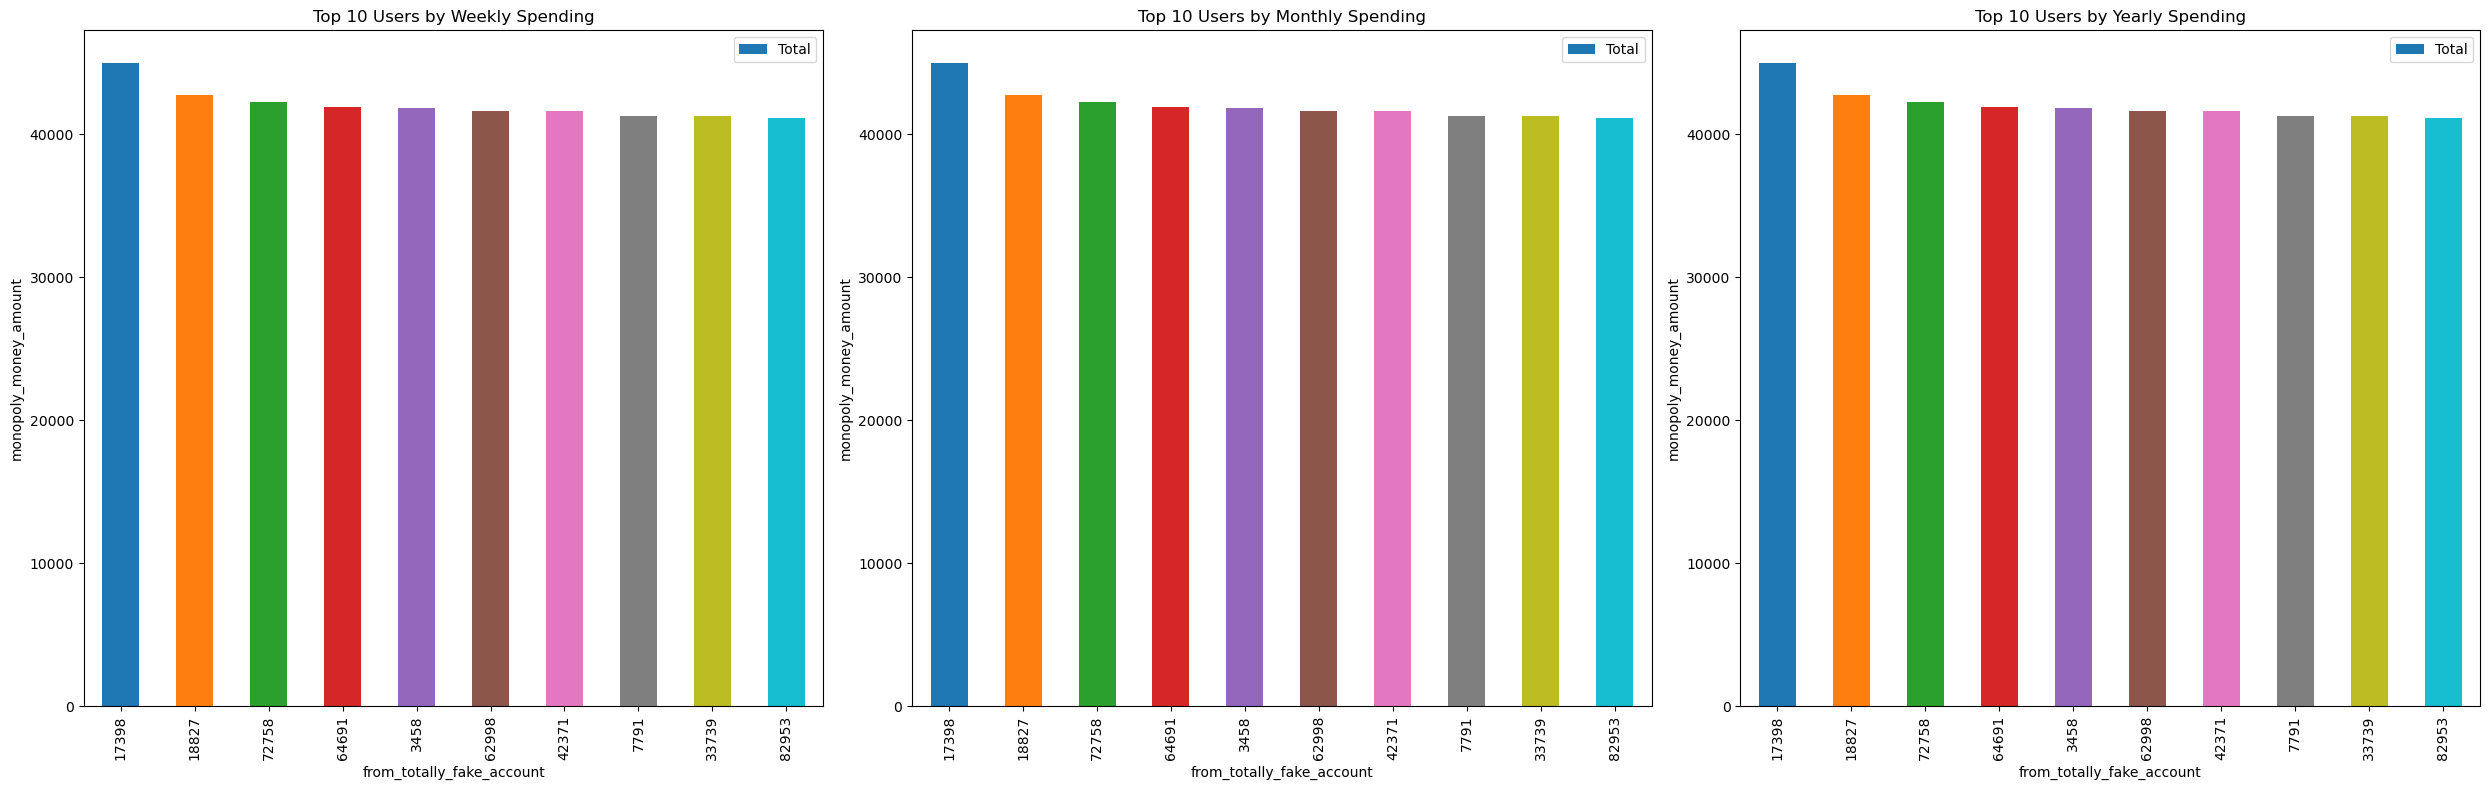

In [19]:
import matplotlib.pyplot as plt

# Define a colormap
colors = plt.cm.tab10.colors  # You can choose any other colormap

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Plot for weekly spending
w_top_10_users.plot(kind='bar', y='Total', ax=axes[0], color=colors)
axes[0].set_title('Top 10 Users by Weekly Spending')
axes[0].set_xlabel('from_totally_fake_account')
axes[0].set_ylabel('monopoly_money_amount')

# Plot for monthly spending
m_top_10_users.plot(kind='bar', y='Total', ax=axes[1], color=colors)
axes[1].set_title('Top 10 Users by Monthly Spending')
axes[1].set_xlabel('from_totally_fake_account')
axes[1].set_ylabel('monopoly_money_amount')

# Plot for yearly spending
y_top_10_users.plot(kind='bar', y='Total', ax=axes[2], color=colors)
axes[2].set_title('Top 10 Users by Yearly Spending')
axes[2].set_xlabel('from_totally_fake_account')
axes[2].set_ylabel('monopoly_money_amount')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Where they are spending
-  relation btween from_totally_fake_account and to_randomly_generated_account

In [20]:
# Group the data by 'from_totally_fake_account' and 'to_randomly_generated_account', then count occurrences
user_spending = data.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).size().reset_index(name='transaction_count')

### transaction_count--how many time he did a transaction to 'to_randomly_generated_account'
# Display the resulting DataFrame
print(user_spending)

        from_totally_fake_account to_randomly_generated_account  \
0                            1000                         16354   
1                            1000                         18013   
2                            1000                         30208   
3                            1000                         31489   
4                            1000                         36647   
...                           ...                           ...   
490955                     100988        WE_HAVE_BEAN_WEIGHTING   
490956                     100988                   WHISKEY_BAR   
490957                     100988                  WHISKEY_SHOP   
490958                     100988                      WINE_BAR   
490959                     100988                   WINE_CELLAR   

        transaction_count  
0                      55  
1                      14  
2                       6  
3                      12  
4                       1  
...                   ...  

In [21]:
# Find the index of the maximum spending for each user
max_spending_index = data.groupby('from_totally_fake_account')['monopoly_money_amount'].idxmax()

# Use the index to retrieve the corresponding 'to_randomly_generated_account' for the maximum spending
max_spending_by_user = data.loc[max_spending_index, ['from_totally_fake_account', 'to_randomly_generated_account', 'monopoly_money_amount']]

# Display the resulting DataFrame
print(max_spending_by_user)    ### maximum amount where user spend and how much

         from_totally_fake_account to_randomly_generated_account  \
5062638                       1000                         31489   
69652                         1002                         23010   
173473                        1006                         80751   
602608                        1018                         11822   
32808                         1053                         57069   
...                            ...                           ...   
261196                      100931                         88568   
109740                      100934                         82585   
9373566                     100947              ELECTRONICS_SHOP   
8891691                     100986                  FASHION_SHOP   
482181                      100988                         51576   

         monopoly_money_amount  
5062638                   1960  
69652                      325  
173473                     205  
602608                     297  
32808             

In [22]:
## try for best fit line

In [23]:
# Initialize counters
numeric_count = 0
categorical_count = 0

# Iterate through unique values in the column
for value in data['to_randomly_generated_account'].unique():
    # Try to convert the value to a numeric type
    try:
        float(value)
        # If successful, increment numeric count
        numeric_count += 1
    except ValueError:
        # If conversion fails, it's categorical
        categorical_count += 1

# Print the counts
print("Numeric values count:", numeric_count)
print("Categorical values count:", categorical_count)


Numeric values count: 14221
Categorical values count: 79


In [24]:
# Print out the unique categorical values
categorical_values = data.loc[~data['to_randomly_generated_account'].apply(lambda x: str(x).replace('.', '').isdigit()), 'to_randomly_generated_account'].unique()
print("Unique categorical values:")
print(categorical_values)


Unique categorical values:
['CINEMA' 'HIPSTER_COFFEE_SHOP' 'TOTALLY_A_REAL_COFFEE_SHOP' 'COFFEE_SHOP'
 'CAFE' 'A_CAFE' 'LOCAL_RESTAURANT' 'A_LOCAL_COFFEE_SHOP'
 'GOURMET_COFFEE_SHOP' 'LOCAL_WATERING_HOLE' 'SANDWICH_SHOP' 'TOY_SHOP'
 'PRETENTIOUS_COFFEE_SHOP' 'BAR' 'PUB' 'COMIC_BOOK_SHOP' 'LUNCH_VAN'
 'DEPARTMENT_STORE' 'KEBAB_SHOP' 'WINE_BAR' 'ELECTRONICS_SHOP'
 'RESTAURANT' 'LOCAL_PUB' 'LUNCH_PLACE' 'FASHION_SHOP'
 'FASHIONABLE_SPORTSWARE_SHOP' 'SCHOOL_SUPPLY_STORE' 'LOCAL_BOOKSHOP'
 'TRAINER_SHOP' 'BOOKSHOP' 'KIDS_ACTIVITY_CENTRE' 'VIDEO_GAME_STORE'
 'CLOTHES_SHOP' 'TAKEAWAY_CURRY' 'TECH_SHOP' 'NERDY_BOOK_STORE'
 'WHISKEY_BAR' 'PET_TOY_SHOP' 'DVD_SHOP' 'CHILDRENDS_SHOP' 'GAME_SHOP'
 'INDIAN_RESTAURANT' 'COCKTAIL_BAR' 'RUNNING_SHOP' 'DIY_STORE' 'COOKSHOP'
 'HOME_IMPROVEMENT_STORE' 'PET_SHOP' 'CHINESE_TAKEAWAY' 'BUTCHERS'
 'SECOND_HAND_BOOKSHOP' 'G&T_BAR' 'GREENGROCER' 'JEWLLERY_SHOP'
 'ACCESSORY_SHOP' 'TAKEAWAY' 'KIDS_CLOTHING_SHOP' 'SPORT_SHOP'
 'STEAK_HOUSE' 'HIPSTER_ELECTRONICS_SHO

In [ ]:
## need to find ways to cluster them

## work on numeric data

In [25]:
# Print out the unique numerical values
numerical_values = data.loc[data['to_randomly_generated_account'].apply(lambda x: str(x).replace('.', '').isdigit()), 'to_randomly_generated_account'].unique()
print("Unique numerical values:")
print(numerical_values)


Unique numerical values:
['40544' '85149' '18555' ... '33524' '24636' '1243']


In [32]:
# Filter the DataFrame for numeric values
#numeric_data = data[data['to_randomly_generated_account'].str.isnumeric()]

# Group the numeric data by 'from_totally_fake_account' and 'to_randomly_generated_account', then count occurrences
user_spending_numeric = numeric_data.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).size().reset_index(name='transaction_count')

# Sort the DataFrame by 'transaction_count' column in descending order
sorted_user_spending = user_spending_numeric.sort_values(by='transaction_count', ascending=False)

# Display the sorted DataFrame
print(sorted_user_spending)


        from_totally_fake_account to_randomly_generated_account  \
112845                      95949                         48935   
88953                       75319                         84860   
57638                       48935                         95949   
119129                     100906                         62440   
86275                       72995                         67853   
...                           ...                           ...   
22390                       19596                         33124   
101182                      86199                         33124   
43117                       36416                         33124   
69670                       59103                          9410   
66856                       56327                         33124   

        transaction_count  
112845                329  
88953                 325  
57638                 318  
119129                301  
86275                 286  
...                   ...  

In [33]:
one_count_transactions = user_spending_numeric[user_spending_numeric['transaction_count'] == 1]
one_count_transactions    ## single transaction count

,from_totally_fake_account,to_randomly_generated_account,transaction_count
4,1000,36647,1
8,1000,47421,1
11,1000,53678,1
27,1002,33124,1
54,1006,80697,1
...,...,...,...
119050,100827,33124,1
119193,100934,33124,1
119194,100934,43489,1
119200,100934,65197,1


In [42]:

# Group the numeric data by 'from_totally_fake_account' and 'to_randomly_generated_account', then count occurrences
user_spending_numeric = numeric_data.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).size().reset_index(name='transaction_count')

# Filter out transactions with a count of 1
user_spending_numeric = user_spending_numeric[user_spending_numeric['transaction_count'] >= 10]

# Sort the DataFrame by 'transaction_count' column in descending order
sorted_user_spending = user_spending_numeric.sort_values(by='transaction_count', ascending=False)

# Display the sorted DataFrame
print(sorted_user_spending)


        from_totally_fake_account to_randomly_generated_account  \
112845                      95949                         48935   
88953                       75319                         84860   
57638                       48935                         95949   
119129                     100906                         62440   
86275                       72995                         67853   
...                           ...                           ...   
20363                       17794                         49641   
27943                       24024                         81959   
39703                       33693                         74909   
39706                       33710                         11307   
10792                        9724                         62916   

        transaction_count  
112845                329  
88953                 325  
57638                 318  
119129                301  
86275                 286  
...                   ...  

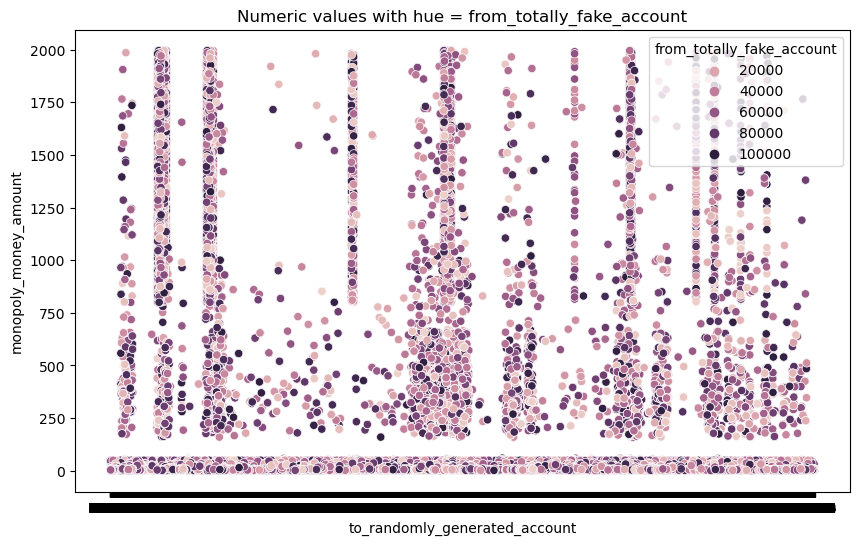

In [27]:
# Filter the DataFrame for numeric values
numeric_data = data[data['to_randomly_generated_account'].str.isnumeric()]

# Plot scatterplot with numeric values and 'to_randomly_generated_account' as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_data, x='to_randomly_generated_account', y='monopoly_money_amount', hue='from_totally_fake_account')
plt.title('Numeric values with hue = from_totally_fake_account')
plt.xlabel('to_randomly_generated_account')
plt.ylabel('monopoly_money_amount')
plt.legend(title='from_totally_fake_account')
plt.show()

In [26]:
## monthly transaction graph
## any non similar users/shops
## work on unique data
## 